### Simple model for EATD-corpus

- Dont use cuda True, the training is way more slower

In [1]:
import pandas as pd
#dev
import importlib as imp
import functions
from functions import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [3]:
BASE_PATH = "datasets/EATD-Corpus"

labels = ['normal', 'mild', 'moderate', 'severe']
folders = os.listdir(BASE_PATH)
# in the folders there are three audio file, named negative_out, neutral_out and positive_out.wav
df = pd.read_csv('datasets/depression_categories_EATD-Corpus.csv')
# the depresison column contains different strings, we need to convert them to integers into a new column
df['depression_category_int'] = df['depression'].map({'normal': 0, 'mild': 1, 'moderate': 2, 'severe': 3})
df['depression_category_int_binary'] = df['depression'].map({'normal': 0, 'mild': 1, 'moderate': 1, 'severe': 1})

df_train = df[df['type'] == 'training']
df_test = df[df['type'] == 'validation']

In [6]:
df.head(5)

,folder,SDS_raw,SDS_index,depression,type,depression_category_int,depression_category_int_binary
0,t_1,37.0,46.25,normal,training,0,0
1,t_10,30.0,37.50,normal,training,0,0
2,t_101,42.0,52.50,mild,training,1,1
3,t_102,66.0,82.50,severe,training,3,1
4,t_103,41.0,51.25,mild,training,1,1


### Step by step model building - BASE

In [7]:
imp.reload(functions)
from functions import *
sentiments=['negative', 'neutral', 'positive']

BASE_PATH
X_train, y_train = process_audio_files(BASE_PATH, df_train, sentiments, method="simple", classification="binary")   


Processing Summary:
Successfully processed: 83 folders
Skipped: 0 files


In [8]:
imp.reload(functions)
from functions import *

X_test, y_test = process_audio_files(BASE_PATH, df_test, sentiments, method="simple", classification="binary")

C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(



Processing Summary:
Successfully processed: 78 folders
Skipped: 1 files

Skipped Files Details:
Folder v_79: Error processing positive_out.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'


In [9]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# feature_importance_xgboost(clf, number_of_features=15)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)


Classification Report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        58
  depression       1.00      1.00      1.00        25

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



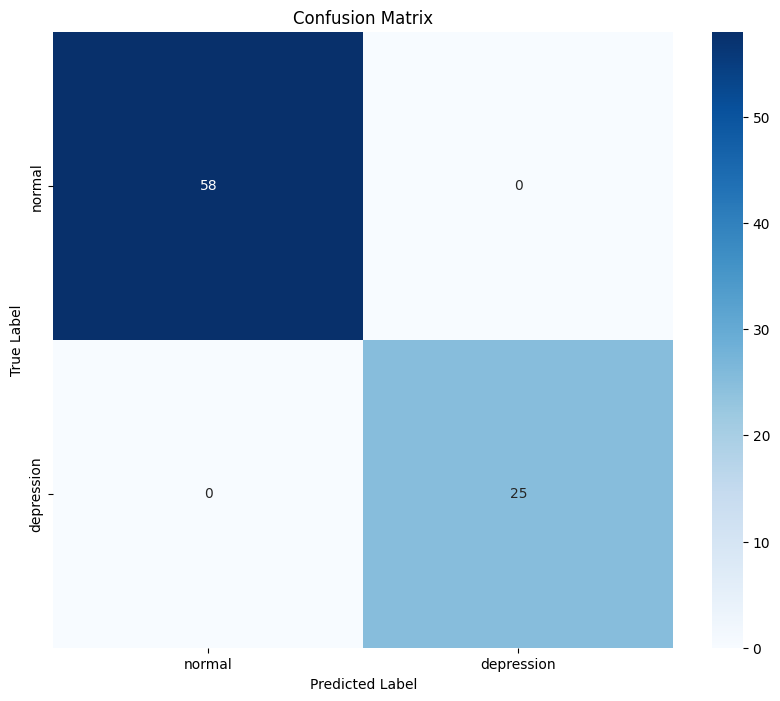


Classification Report:
              precision    recall  f1-score   support

      normal       0.79      0.79      0.79        58
  depression       0.40      0.40      0.40        20

    accuracy                           0.69        78
   macro avg       0.60      0.60      0.60        78
weighted avg       0.69      0.69      0.69        78



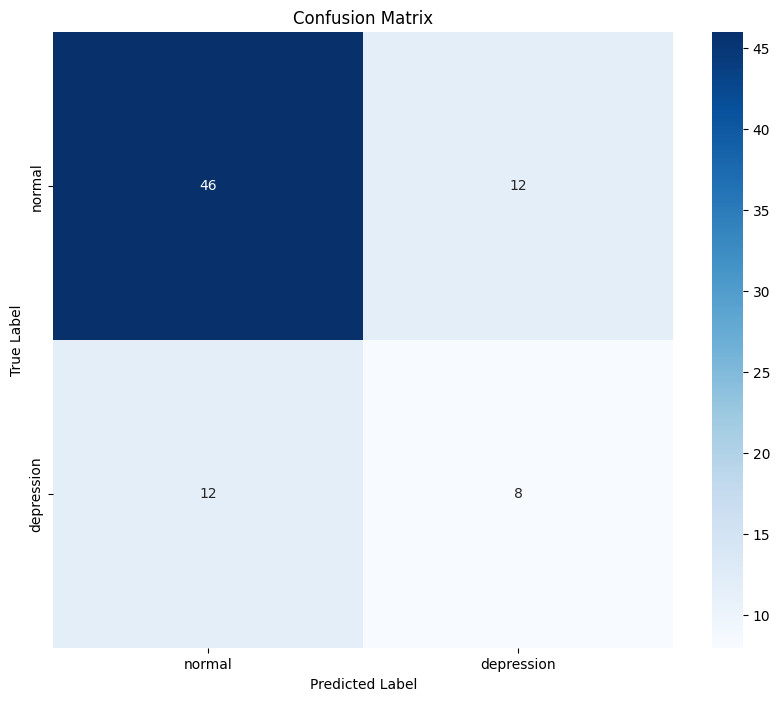

In [12]:
imp.reload(functions)
from functions import *

# if classificaation is binarry
labels = ['normal', 'depression']

confusion_matrix_report(y_train, y_pred_train, labels)
confusion_matrix_report(y_test, y_pred_test, labels)

## XGBoost

In [ ]:
imp.reload(functions)
from functions import *
sentiments=['negative', 'neutral', 'positive']
sentiments = ['positive']

# binary classification
labels = ['normal', 'depression']

X_train, y_train = process_audio_files(BASE_PATH, df_train, sentiments=sentiments)
X_test, y_test = process_audio_files(BASE_PATH, df_test, sentiments=sentiments)
XGBoostModel = train_xgboost_grid_search_simple(X_train, y_train, use_cuda=True)

Processing inputs: base_path=datasets/EATD-Corpus, sentiments=['positive'], method=simple, classification=binary

Processing Summary:
Successfully processed: 83 folders
Skipped: 0 files
Processing inputs: base_path=datasets/EATD-Corpus, sentiments=['positive'], method=simple, classification=binary


C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(



Processing Summary:
Successfully processed: 78 folders
Skipped: 1 files

Skipped Files Details:
Folder v_79: Error processing positive_out.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
TRAIN STARTS
Training XGBoost model with grid search...
Fitting 5 folds for each of 192 candidates, totalling 960 fits

Best parameters found:
colsample_bytree: 0.8
gamma: 0.1
learning_rate: 0.01
max_depth: 4
min_child_weight: 1
n_estimators: 100
subsample: 0.8


c:\Program Files\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:05:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
imp.reload(functions)
from functions import *
# binary classification
labels = ['normal', 'depression']
XGBoostModel = train_xgboost_grid_search_simple(X_train, y_train, use_cuda=False)

     TRAIN STARTS
Training XGBoost model with grid search...
Fitting 5 folds for each of 192 candidates, totalling 960 fits


c:\Program Files\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:19:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:19:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best parameters found:
colsample_bytree: 0.9
gamma: 0.1
learning_rate: 0.01
max_depth: 5
min_child_weight: 1
n_estimators: 100
predictor: gpu_predictor
subsample: 0.9
tree_method: gpu_hist
Training time: 628.02 seconds


c:\Program Files\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:50:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:50:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for boost


Classification Report:
              precision    recall  f1-score   support

      normal       0.97      1.00      0.98        58
  depression       1.00      0.92      0.96        25

    accuracy                           0.98        83
   macro avg       0.98      0.96      0.97        83
weighted avg       0.98      0.98      0.98        83



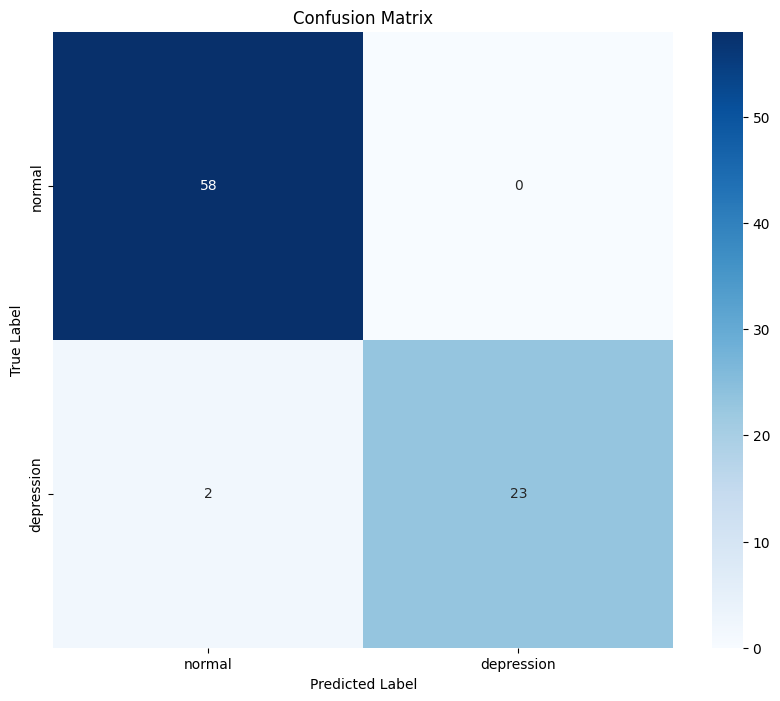


Classification Report:
              precision    recall  f1-score   support

      normal       0.76      0.93      0.84        58
  depression       0.43      0.15      0.22        20

    accuracy                           0.73        78
   macro avg       0.59      0.54      0.53        78
weighted avg       0.68      0.73      0.68        78



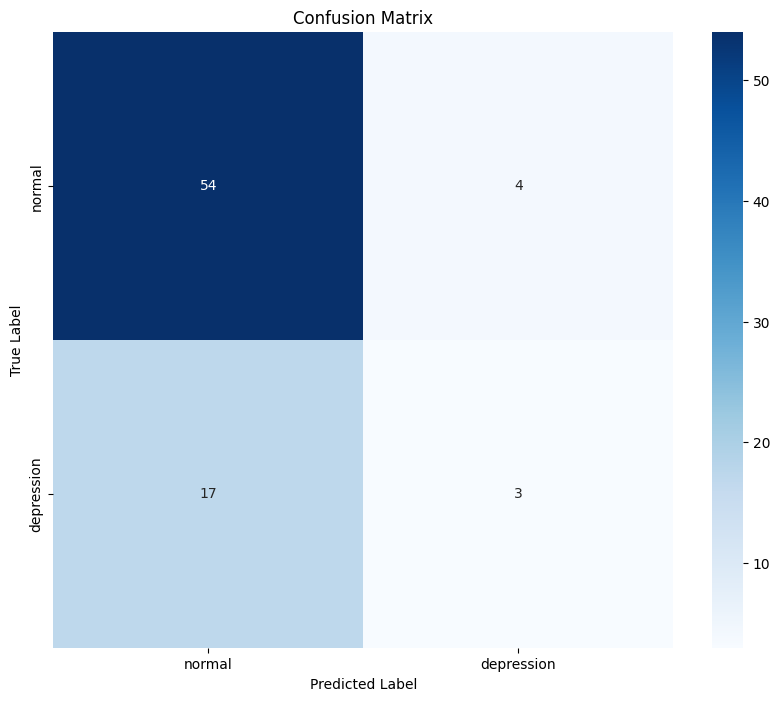

In [10]:
imp.reload(functions)
from functions import *
y_pred_train = XGBoostModel.predict(X_train)

labels = ['normal', 'depression']

confusion_matrix_report(y_train, y_pred_train, labels)
# feature_importance_xgboost(XGBoostModel)

y_pred_test = XGBoostModel.predict(X_test)
confusion_matrix_report(y_test, y_pred_test, labels)

-----------------

### Train with unbalanced datas

In [15]:
imp.reload(functions)
from functions import *


sentiments=['negative', 'neutral', 'positive']
sentiments = ['negative']
X_train, y_train = process_audio_files(BASE_PATH, df_train, sentiments=sentiments, method="simple")
X_test, y_test = process_audio_files(BASE_PATH, df_test, sentiments=sentiments, method="simple")


Processing Summary:
Successfully processed: 83 folders
Skipped: 0 files


C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(



Processing Summary:
Successfully processed: 78 folders
Skipped: 1 files

Skipped Files Details:
Folder v_79: Error processing positive_out.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'



Training with smote strategy...

Initial class distribution:
Class 0: 58 samples
Class 1: 25 samples

Using 3-fold cross-validation due to class sizes

Applying SMOTE oversampling...

Class distribution after balancing:
Class 0: 58 samples
Class 1: 58 samples
Fitting 3 folds for each of 192 candidates, totalling 576 fits

Best parameters found:
colsample_bytree: 0.8
gamma: 0
learning_rate: 0.1
max_depth: 5
min_child_weight: 3
n_estimators: 100
subsample: 0.9

Training with undersample strategy...

Initial class distribution:
Class 0: 58 samples
Class 1: 25 samples

Using 3-fold cross-validation due to class sizes

Applying undersampling to majority class...

Class distribution after balancing:
Class 0: 25 samples
Class 1: 25 samples
Fitting 3 folds for each of 192 candidates, totalling 576 fits

Best parameters found:
colsample_bytree: 0.8
gamma: 0.1
learning_rate: 0.01
max_depth: 3
min_child_weight: 1
n_estimators: 100
subsample: 0.8

Training with combine strategy...

Initial class 

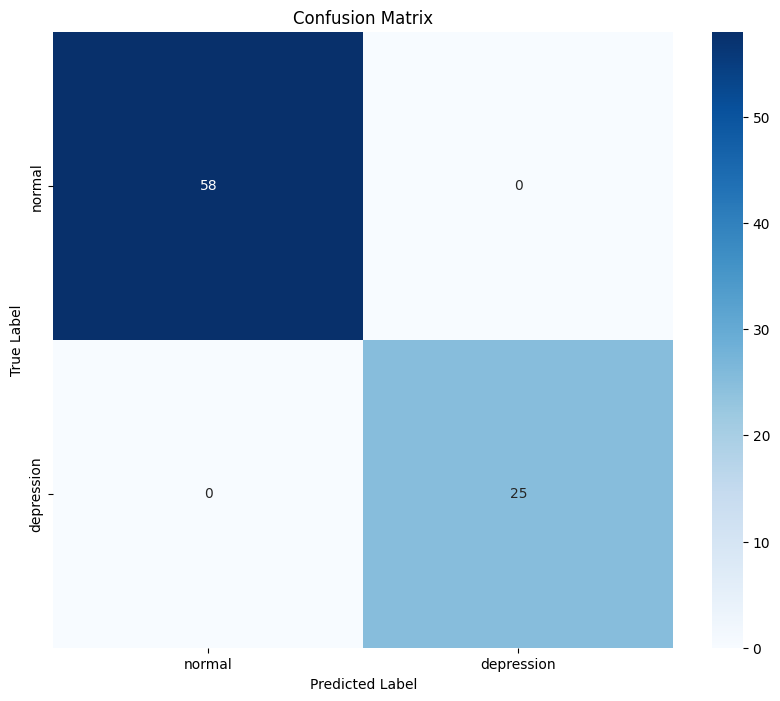


Classification Report:
              precision    recall  f1-score   support

      normal       0.74      0.93      0.82        58
  depression       0.20      0.05      0.08        20

    accuracy                           0.71        78
   macro avg       0.47      0.49      0.45        78
weighted avg       0.60      0.71      0.63        78



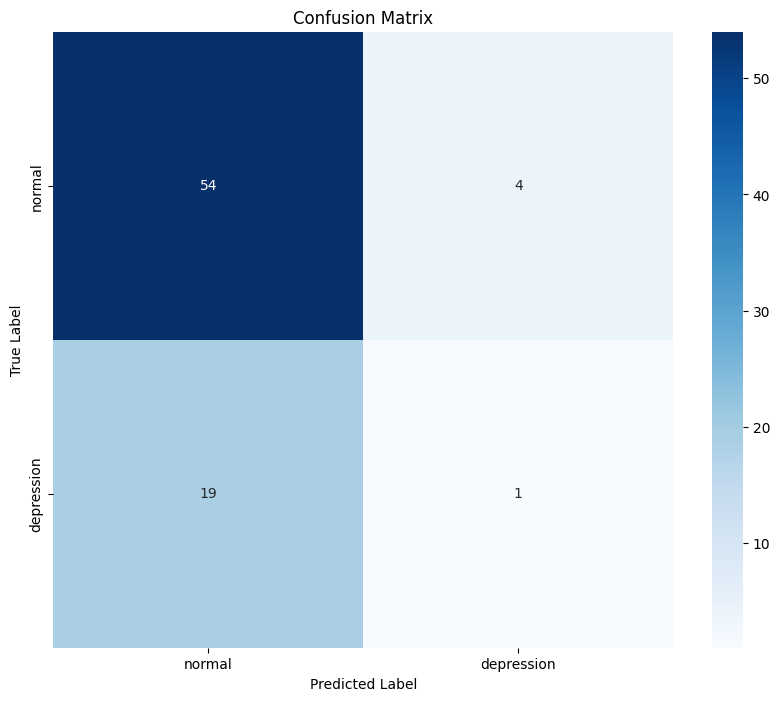


Results for undersample strategy:

Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.78      0.87        58
  depression       0.66      1.00      0.79        25

    accuracy                           0.84        83
   macro avg       0.83      0.89      0.83        83
weighted avg       0.90      0.84      0.85        83



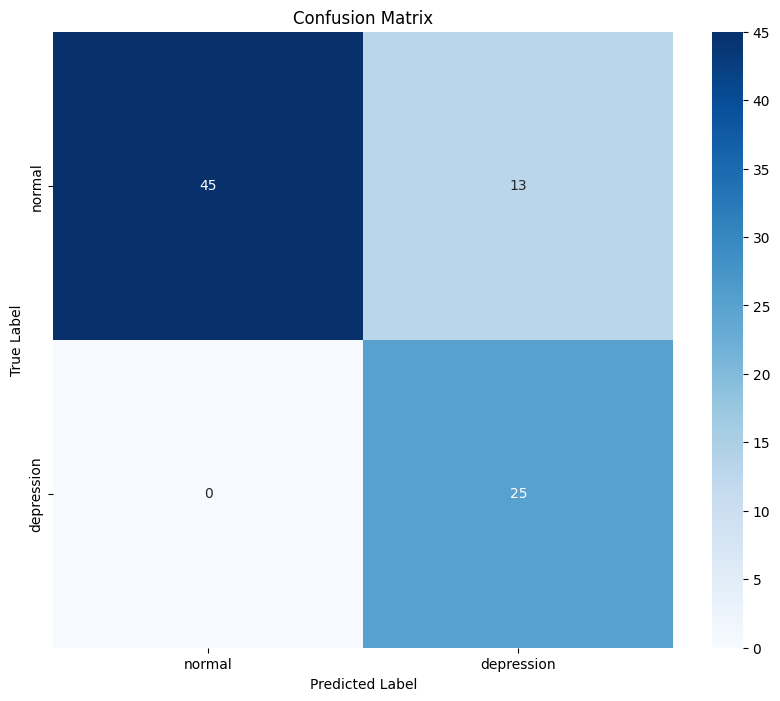


Classification Report:
              precision    recall  f1-score   support

      normal       0.73      0.79      0.76        58
  depression       0.20      0.15      0.17        20

    accuracy                           0.63        78
   macro avg       0.47      0.47      0.47        78
weighted avg       0.59      0.63      0.61        78



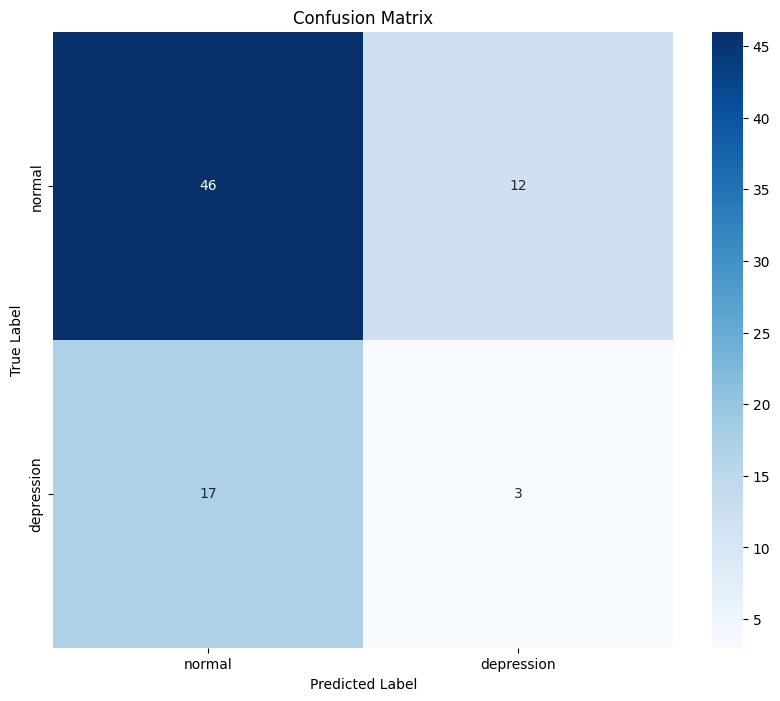


Results for combine strategy:

Classification Report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        58
  depression       1.00      1.00      1.00        25

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



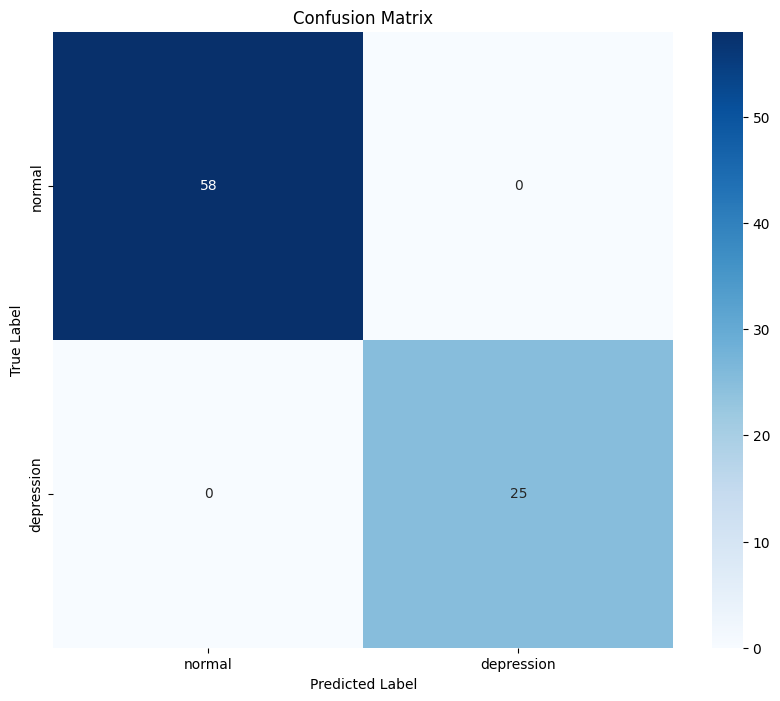


Classification Report:
              precision    recall  f1-score   support

      normal       0.74      0.95      0.83        58
  depression       0.25      0.05      0.08        20

    accuracy                           0.72        78
   macro avg       0.50      0.50      0.46        78
weighted avg       0.62      0.72      0.64        78



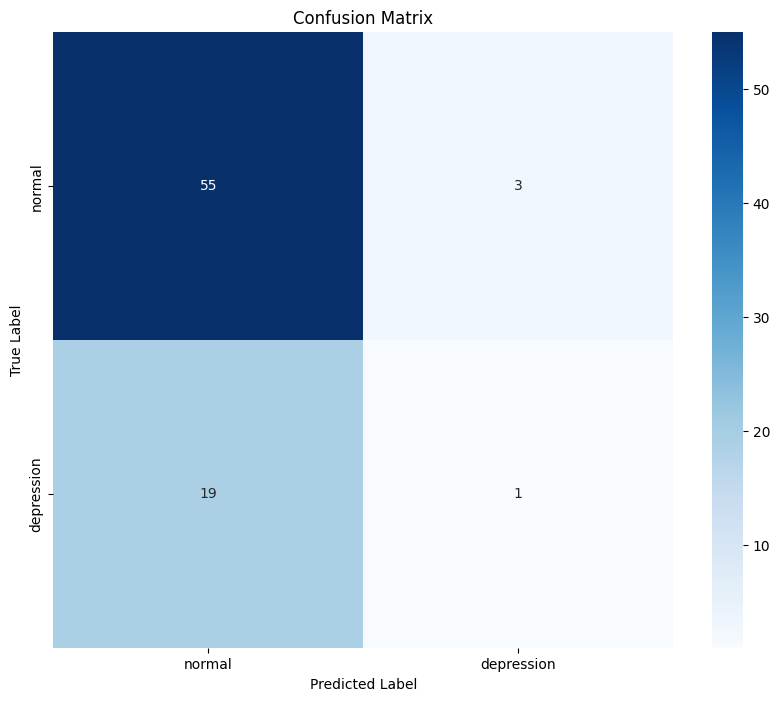


Results for weighted strategy:

Classification Report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        58
  depression       1.00      1.00      1.00        25

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



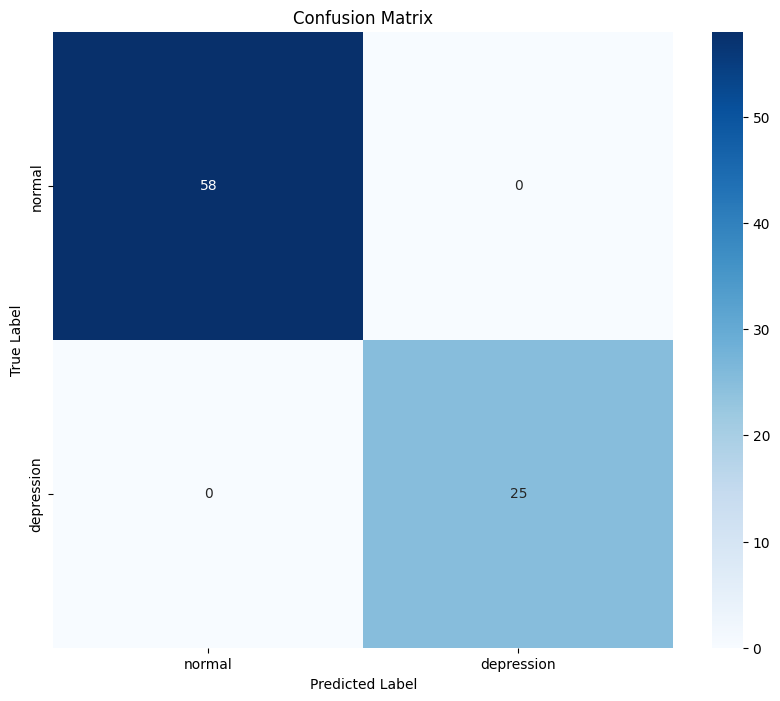


Classification Report:
              precision    recall  f1-score   support

      normal       0.75      0.93      0.83        58
  depression       0.33      0.10      0.15        20

    accuracy                           0.72        78
   macro avg       0.54      0.52      0.49        78
weighted avg       0.64      0.72      0.66        78



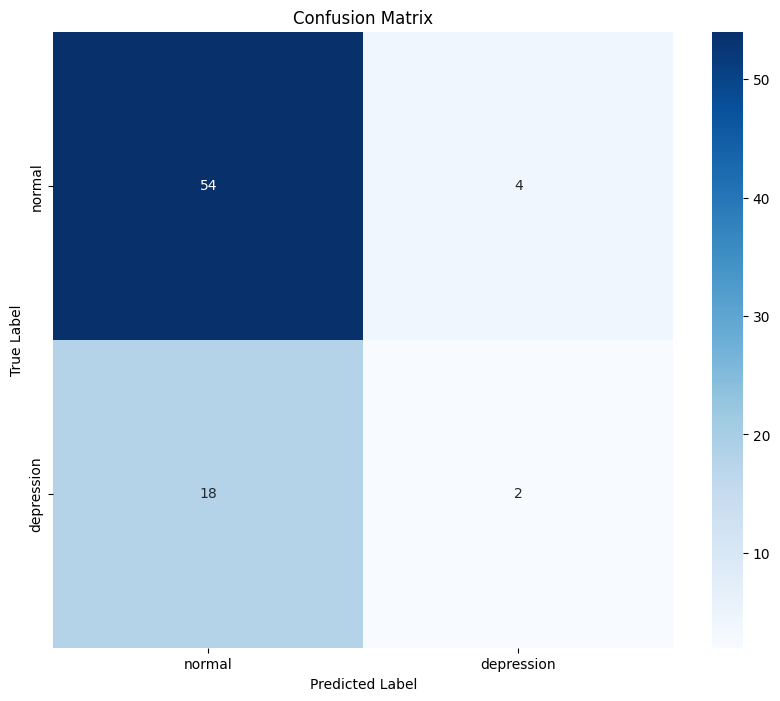

In [16]:
imp.reload(functions)
from functions import *

strategies = ['smote', 'undersample', 'combine', 'weighted']
models = {}

for strategy in strategies:
    print(f"\nTraining with {strategy} strategy...")
    models[strategy] = train_balanced_xgboost_grid_search(X_train, y_train, balance_strategy=strategy)

for strategy in strategies:
    print(f"\nResults for {strategy} strategy:")
    y_pred_train = models[strategy].predict(X_train)
    confusion_matrix_report(y_train, y_pred_train, labels)
    y_pred_test = models[strategy].predict(X_test)
    confusion_matrix_report(y_test, y_pred_test, labels)